In [1]:
#pip install matplotlib
#pip install fuzzymatcher

In [2]:
import pandas as pd

# Explore dataset

In [3]:
df_left = pd.read_csv("left_dataset.csv")
df_right = pd.read_csv("right_dataset.csv")

print(df_left.shape)
print(df_right.shape)

(94585, 7)
(91791, 7)


In [4]:
# df_left.head()
df_left.sample(8)

,entity_id,name,address,city,state,postal_code,categories
75996,75997,Holloway's Farm Supply,3036 Land O Lakes Blvd,Land O Lakes,FL,34639.0,"Home & Garden, Shopping"
92571,92572,McDonald's,7822 Brookville Rd,Indianapolis,IN,46239.0,"Coffee & Tea, Restaurants, Food, Fast Food, Bu..."
69676,69677,Dunkin',6842 Whitestown Pkwy,Zionsville,IN,46077.0,"Coffee & Tea, Restaurants, Breakfast & Brunch,..."
29329,29330,Handrolled Cigars,4058 Tampa Rd,Oldsmar,FL,34677.0,"Food, Shopping, Tobacco Shops, Beer, Wine & Sp..."
36549,36550,Guitar Center,"11977 St Charles Rock Rd, Ste 100 Bldg H",Bridgeton,MO,63044.0,"Musical Instruments & Teachers, Local Services..."
20402,20403,ShopRite of Hatfield,170 Forty Foot Rd,Hatfield,PA,19440.0,"Food, Grocery, Delis, Bakeries, Restaurants"
73024,73025,Women's Health Care Group,7996 Oxford Ave,Philadelphia,PA,19111.0,"Doctors, Health & Medical, Obstetricians & Gyn..."
34498,34499,New South China,1640 South St,Philadelphia,PA,19146.0,"Restaurants, Chinese"


In [5]:
# df_right.head()
df_right.sample(8)

,business_id,name,address,city,state,zip_code,size
84677,84678,TS SEO LLC,2020 FIELDSTONE PARKWAY,Franklin,TN,37069-4337,8.0
22378,22379,"ALPHA BUSINESS COMMUNICATIONS, INC.",1087 E Brandon Blvd,BRANDON,FL,33511,2.0
55727,55728,J R BRILLMAN INC,101 FRIENDS LN,NEWTOWN,PA,18940-1805,7.0
29182,29183,EVENTPRO SERVICES INC.,3905 Vincennes Rd,Indianapolis,IN,46268-3026,3.0
78782,78783,MEDIA ART EXPO INC,SPRINGFIELD MALL SHOP L3B SPRINGFIELD MALL SHO...,SPRINGFIELD,PA,19064,3.0
18492,18493,CAININE CONNECTIONS INC.,14442 Dale Mabry Highway,TAMPA,FL,33618,5.0
2407,2408,"SALON VOLO, INC.",5848 54th Ave N,Saint Petersburg,FL,33709-1902,15.0
67430,67431,"ROGERS LAND TRANSFER, LLC",26 E ATHENS AVE,ARDMORE,PA,19003-2140,2.0


In [6]:
# col name
print(f"df_left columns: {list(df_left.columns)}")
print(f"df_right columns: {list(df_right.columns)}")

df_left columns: ['entity_id', 'name', 'address', 'city', 'state', 'postal_code', 'categories']
df_right columns: ['business_id', 'name', 'address', 'city', 'state', 'zip_code', 'size']


In [7]:
# duplicate company id (the results show no duplicate id)
print(sum(df_left['entity_id'].duplicated()))
print(sum(df_right['business_id'].duplicated()))

0
0


# Data Cleaning


## zip code

### df_left

In [8]:
df_left["postal_code"].dtype

dtype('float64')

In [9]:
# replace na with 0 in "postal_code"
df_left["postal_code"] = df_left["postal_code"].fillna(0)

In [10]:
# convert df_left["postal_code"] to string due to leading and trailing 0s
df_left["zip_code_str"] = df_left["postal_code"].astype(int).astype(str)

# count the length of zip codes
df_left["zip_code_str"].map(len).value_counts()

5    94543
1       37
4        4
6        1
Name: zip_code_str, dtype: int64

In [11]:
# examine row with zip code length of 6
df_left[df_left["zip_code_str"].map(len) == 6]

,entity_id,name,address,city,state,postal_code,categories,zip_code_str
65929,65930,Apna Kabab House,20323 Bruce B Downs Blvd,Tampa,FL,336140.0,"Restaurants, Indian, Halal, Pakistani",336140


In [12]:
# change the above zip code to 33614 after varification based on city and state
df_left['zip_code_str'] = df_left['zip_code_str'].replace('336140', '33614')

In [13]:
# fill the leading 0 in zip code
df_left["zip_code_str"] = df_left["zip_code_str"].str.zfill(5)

In [14]:
# count the length of zip codes again, now all "zip_code_string" are 5 digit strings
df_left["zip_code_str"].map(len).value_counts()

5    94585
Name: zip_code_str, dtype: int64

### df_right

In [15]:
df_right["zip_code"].dtype

dtype('O')

In [16]:
df_right["zip_code"].map(len).value_counts()

10    61572
5     30209
7         9
9         1
Name: zip_code, dtype: int64

In [17]:
# examine row with zip code length of 7
df_right[df_right["zip_code"].map(len) == 7]

,business_id,name,address,city,state,zip_code,size
6804,6805,SUNSHINE AGENTS CORPORATION,4114 Amber Lane,Palm Harbor,FL,34685--,4.0
16141,16142,RICHARD W OSBORNE PA,320 West Kennedy Boulevard,Tampa,FL,33606--,2.0
22566,22567,THE SHELL STORE LLC,8211 Ulmerton Road,Largo,FL,33771--,2.0
33369,33370,FIFTH AVE MANAGEMENT INC,2301 North Hawthorne Lane,Indianapolis,IN,46218--,4.0
47368,47369,LOOKS BY LISA,3010 Locust Street,St. Louis,MO,63103--,25.0
48579,48580,CRUZ'S MAGICAL NURSERY,1621 Rosado Drive,St. Louis,MO,63138--,5.0
69641,69642,"SUPER FENCE COMPANY, LLC",2717 Haverford Road,Ardmore,PA,19003--,6.0
76398,76399,ST JOHNS BAPTIST CHURCH,1232 Tasker Ave.,Philadelphia,PA,19148--,4.0
88756,88757,"GALLATIN MARKET , MADISON BP",3237 Gallatin Pike,Nashville,TN,37216--,4.0


In [18]:
# remove trailing -- in zip_code
df_right['zip_code'] = df_right['zip_code'].apply(lambda x: x.replace('-', '') if len(x)==7 else x)

In [19]:
# length of 10 are due to extended ZIP+4 code
df_right[df_right["zip_code"].map(len) == 10].sample(3)

,business_id,name,address,city,state,zip_code,size
20216,20217,LAW FIRM OF SONYA C COLON,1311 W Fletcher Ave Georgetown Office Park,Tampa,FL,33612-3310,2.0
35024,35025,"JOSH FIELDS AGENCY, INC",5645 W 79TH ST,INDIANAPOLIS,IN,46278-1711,4.0
65093,65094,AUM SHREEJI LLC,842 RED LION RD,PHILADELPHIA,PA,19115-1475,18.0


In [20]:
# examine row with zip code length of 9 (maybe due to data entry error)
df_right[df_right["zip_code"].map(len) == 9]

,business_id,name,address,city,state,zip_code,size
21047,21048,SUNCOAST BAPTIST,6559 126th Avenue N,Largo,FL,33762-525,4.0


In [21]:
# keep only the first five digit of 9/10-digit zip_code because df_left only contains 5 digits
# so it's no meaning to keep the extended digits
df_right['zip_code'] = df_right['zip_code'].apply(lambda x: x[:5] if len(x) in [9, 10] else x)

In [22]:
# the zip_code column is clean now
df_right["zip_code"].map(len).value_counts()

5    91791
Name: zip_code, dtype: int64

In [23]:
# Convert all strings to lower case
df_left = df_left.applymap(lambda s:s.lower() if type(s) == str else s)
df_right = df_right.applymap(lambda s:s.lower() if type(s) == str else s)

In [24]:
# Merge address, city, state into a single column
df_left['address_combined'] = df_left.apply(lambda row: ' '.join(row[['address', 'city', 'state']].astype(str)), axis=1)
df_right['address_combined'] = df_right.apply(lambda row: ' '.join(row[['address', 'city', 'state']].astype(str)), axis=1)

In [25]:
df_left.drop(['postal_code','categories'], axis=1, inplace=True)
df_right.drop(['size'], axis=1, inplace=True)

In [26]:
df_left.head()

,entity_id,name,address,city,state,zip_code_str,address_combined
0,1,the ups store,87 grasso plaza shopping center,affton,mo,63123,87 grasso plaza shopping center affton mo
1,2,st honore pastries,935 race st,philadelphia,pa,19107,935 race st philadelphia pa
2,3,perkiomen valley brewery,101 walnut st,green lane,pa,18054,101 walnut st green lane pa
3,4,sonic drive-in,615 s main st,ashland city,tn,37015,615 s main st ashland city tn
4,5,famous footwear,"8522 eager road, dierbergs brentwood point",brentwood,mo,63144,"8522 eager road, dierbergs brentwood point bre..."


In [27]:
df_right.head()

,business_id,name,address,city,state,zip_code,address_combined
0,1,sourini painting inc.,12800 44th st n,clearwater,fl,33762,12800 44th st n clearwater fl
1,2,wolff dolla bill llc,1905 e 19th ave,tampa,fl,33605,1905 e 19th ave tampa fl
2,3,"comprehensive surgery center, llc","1988 gulf to bay blvd, ste 1",clearwater,fl,33765,"1988 gulf to bay blvd, ste 1 clearwater fl"
3,4,frank & adam apparel llc,13640 wright cir,tampa,fl,33626,13640 wright cir tampa fl
4,5,moreno plus transport inc,8608 huron court unite 58,tampa,fl,33614,8608 huron court unite 58 tampa fl


## Remove punctuations in name and address_combined

In [28]:
import string

# Define a lambda function to remove punctuation from a string
remove_punct = lambda x: x.translate(str.maketrans('', '', string.punctuation))

# Remove punctuation from the "name" and "address_combined" columns in both datasets
df_left["name"] = df_left["name"].apply(remove_punct)
df_left["address_combined"] = df_left["address_combined"].apply(remove_punct)

df_right["name"] = df_right["name"].apply(remove_punct)
df_right["address_combined"] = df_right["address_combined"].apply(remove_punct)

In [29]:
df_left.head()

,entity_id,name,address,city,state,zip_code_str,address_combined
0,1,the ups store,87 grasso plaza shopping center,affton,mo,63123,87 grasso plaza shopping center affton mo
1,2,st honore pastries,935 race st,philadelphia,pa,19107,935 race st philadelphia pa
2,3,perkiomen valley brewery,101 walnut st,green lane,pa,18054,101 walnut st green lane pa
3,4,sonic drivein,615 s main st,ashland city,tn,37015,615 s main st ashland city tn
4,5,famous footwear,"8522 eager road, dierbergs brentwood point",brentwood,mo,63144,8522 eager road dierbergs brentwood point bren...


In [30]:
df_right.head()

,business_id,name,address,city,state,zip_code,address_combined
0,1,sourini painting inc,12800 44th st n,clearwater,fl,33762,12800 44th st n clearwater fl
1,2,wolff dolla bill llc,1905 e 19th ave,tampa,fl,33605,1905 e 19th ave tampa fl
2,3,comprehensive surgery center llc,"1988 gulf to bay blvd, ste 1",clearwater,fl,33765,1988 gulf to bay blvd ste 1 clearwater fl
3,4,frank adam apparel llc,13640 wright cir,tampa,fl,33626,13640 wright cir tampa fl
4,5,moreno plus transport inc,8608 huron court unite 58,tampa,fl,33614,8608 huron court unite 58 tampa fl


In [31]:
df_right.nunique()

business_id         91791
name                78770
address             75301
city                   44
state                   5
zip_code              459
address_combined    74480
dtype: int64

In [32]:
df_left.nunique()

entity_id           94585
name                71739
address             77113
city                  794
state                   5
zip_code_str          744
address_combined    78817
dtype: int64

In [33]:
# The number of cities are differnet between the two datasets.

In [34]:
dfmap_left = df_left[['zip_code_str', 'entity_id']]
dfmap_left.head()

,zip_code_str,entity_id
0,63123,1
1,19107,2
2,18054,3
3,37015,4
4,63144,5


In [35]:
dfmap_right = df_right[['zip_code', 'business_id']]
dfmap_right.head()

,zip_code,business_id
0,33762,1
1,33605,2
2,33765,3
3,33626,4
4,33614,5


## Data Exploration with Visualizations

### US Map based on Zipcode

In [36]:
# pip install folium

In [37]:
import folium
# Load the dataset that contains latitude & longitude information
data = pd.read_csv('zip_lat_long.csv')

# Create the map
map_left = folium.Map(location=[37, -102], zoom_start=5)
map_right = folium.Map(location=[37, -102], zoom_start=5)

In [38]:
dfmap_left.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94585 entries, 0 to 94584
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   zip_code_str  94585 non-null  object
 1   entity_id     94585 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


In [39]:
# Rename the column names in the additional dataset
dfmap_left = dfmap_left.rename(columns={'zip_code_str': 'ZIP', 'entity_id': 'entity_id'})

In [40]:
# Convert the 'Zip Code' column to a string data type in both dataframes
dfmap_left['ZIP'] = dfmap_left['ZIP'].astype(str)
data['ZIP'] = data['ZIP'].astype(str)

# Merge the datasets on the 'Zip Code' column
merged_left = pd.merge(dfmap_left, data, on='ZIP')

In [41]:
# Add markers for each zip code with additional data
for index, row in merged_left.iterrows():
    folium.Marker(location=[row['LAT'], row['LNG']], popup=row['entity_id']).add_to(map_left)

In [42]:
dfmap_right.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91791 entries, 0 to 91790
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   zip_code     91791 non-null  object
 1   business_id  91791 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


In [43]:
# Rename the column names in the additional dataset
dfmap_right = dfmap_right.rename(columns={'zip_code': 'ZIP', 'business_id': 'business_id'})

# Convert the 'Zip Code' column to a string data type
dfmap_right['ZIP'] = dfmap_right['ZIP'].astype(str)

# Merge the datasets on the 'Zip Code' column
merged_right = pd.merge(dfmap_right, data, on='ZIP')

In [44]:
# Add markers for each zip code with additional data
for index, row in merged_right.iterrows():
    folium.Marker(location=[row['LAT'], row['LNG']], popup=row['business_id']).add_to(map_right)

# inner join two dfs and see the perfect match (try)

In [45]:
# Merge address_combined and postal_code into a single column
df_left['address_combined_with_zip'] = df_left.apply(lambda row: ' '.join(row[['address_combined', 'zip_code_str']].astype(str)), axis=1)
df_right['address_combined_with_zip'] = df_right.apply(lambda row: ' '.join(row[['address_combined', 'zip_code']].astype(str)), axis=1)

In [46]:
import string

# Remove punctuation from the "address_combined_with_zip" column in both datasets
df_left["address_combined_with_zip"] = df_left["address_combined_with_zip"].apply(remove_punct)
df_right["address_combined_with_zip"] = df_right["address_combined_with_zip"].apply(remove_punct)

In [47]:
df_left.head()

,entity_id,name,address,city,state,zip_code_str,address_combined,address_combined_with_zip
0,1,the ups store,87 grasso plaza shopping center,affton,mo,63123,87 grasso plaza shopping center affton mo,87 grasso plaza shopping center affton mo 63123
1,2,st honore pastries,935 race st,philadelphia,pa,19107,935 race st philadelphia pa,935 race st philadelphia pa 19107
2,3,perkiomen valley brewery,101 walnut st,green lane,pa,18054,101 walnut st green lane pa,101 walnut st green lane pa 18054
3,4,sonic drivein,615 s main st,ashland city,tn,37015,615 s main st ashland city tn,615 s main st ashland city tn 37015
4,5,famous footwear,"8522 eager road, dierbergs brentwood point",brentwood,mo,63144,8522 eager road dierbergs brentwood point bren...,8522 eager road dierbergs brentwood point bren...


In [48]:
df_right.head()

,business_id,name,address,city,state,zip_code,address_combined,address_combined_with_zip
0,1,sourini painting inc,12800 44th st n,clearwater,fl,33762,12800 44th st n clearwater fl,12800 44th st n clearwater fl 33762
1,2,wolff dolla bill llc,1905 e 19th ave,tampa,fl,33605,1905 e 19th ave tampa fl,1905 e 19th ave tampa fl 33605
2,3,comprehensive surgery center llc,"1988 gulf to bay blvd, ste 1",clearwater,fl,33765,1988 gulf to bay blvd ste 1 clearwater fl,1988 gulf to bay blvd ste 1 clearwater fl 33765
3,4,frank adam apparel llc,13640 wright cir,tampa,fl,33626,13640 wright cir tampa fl,13640 wright cir tampa fl 33626
4,5,moreno plus transport inc,8608 huron court unite 58,tampa,fl,33614,8608 huron court unite 58 tampa fl,8608 huron court unite 58 tampa fl 33614


In [49]:
# inner join
df_perfect_match = pd.merge(df_left, df_right, on=['name', 'address_combined_with_zip'], how='inner')

cols = ["entity_id","business_id","name","address_combined_with_zip"]
df_perfect_match[cols]

,entity_id,business_id,name,address_combined_with_zip
0,159,16722,nails beauty lounge,953 e brandon blvd brandon fl 33511
1,394,74086,state street kitchen,24 s state st newtown pa 18940
2,555,69048,a jackson ecker inc,144 king st pottstown pa 19464
3,608,54989,philadelphia skating club and humane society,220 holland ave ardmore pa 19003
4,715,74025,golden triangle,610 s 5th st philadelphia pa 19147
...,...,...,...,...
512,93796,66065,dml automotive,1001 wilmington pike west chester pa 19382
513,93810,85588,the spectacle shoppe,1015 westhaven blvd ste 100 franklin tn 37064
514,93810,85589,the spectacle shoppe,1015 westhaven blvd ste 100 franklin tn 37064
515,93973,50414,creative nails,4155 lindell blvd saint louis mo 63108


In [50]:
# number of perfect match
print(f"Number of perfect match: {len(df_perfect_match)}")

Number of perfect match: 517


# Grouping & bucketing strategy - by zip code
https://www.kaggle.com/code/satishgunjal/fuzzy-record-matching-using-machine-learning#Introduction

## Examine groups

In [51]:
len(set(df_left["zip_code_str"]))


744

In [52]:
len(set(df_right["zip_code"]))

459

In [53]:
# count by zip code
counts_left = df_left["zip_code_str"].value_counts()
counts_left

19103    1361
19107    1353
19147    1255
37203    1179
33511     940
         ... 
38066       1
46211       1
37130       1
37604       1
33595       1
Name: zip_code_str, Length: 744, dtype: int64

In [54]:
counts_right = df_right["zip_code"].value_counts()
counts_right.head(10)

37203    1258
37064    1139
19103    1051
37211    1028
33511     992
37067     886
33606     872
33614     871
19382     840
19107     821
Name: zip_code, dtype: int64

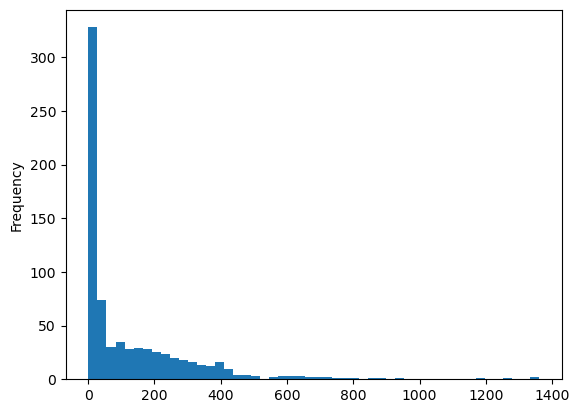

In [55]:
import matplotlib.pyplot as plt

counts_left.plot(kind="hist", bins=50)
plt.show()

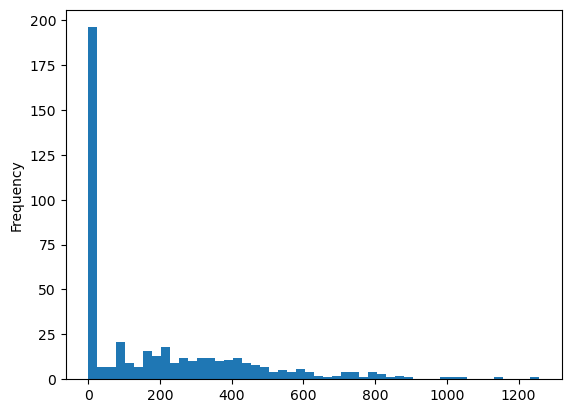

In [56]:

counts_right.plot(kind="hist", bins=50)
plt.show()

In [57]:
# left
print(f"There are {(counts_left > 500).sum()} zip codes with counts > 500.")
print(f"There are {(counts_left > 200).sum()} zip codes with counts > 200.")
print(f"There are {(counts_left > 100).sum()} zip codes with counts > 100.")
print(f"There are {(counts_left > 50).sum()} zip codes with counts > 50.")
print(f"There are {(counts_left > 5).sum()} zip codes with counts > 5.")
print(f"There are {(counts_left < 5).sum()} zip codes with counts < 5.")

There are 29 zip codes with counts > 500.
There are 183 zip codes with counts > 200.
There are 287 zip codes with counts > 100.
There are 358 zip codes with counts > 50.
There are 495 zip codes with counts > 5.
There are 242 zip codes with counts < 5.


In [58]:
# right
print(f"There are {(counts_right > 500).sum()} zip codes with counts > 500.")
print(f"There are {(counts_right > 200).sum()} zip codes with counts > 200.")
print(f"There are {(counts_right > 100).sum()} zip codes with counts > 100.")
print(f"There are {(counts_right > 50).sum()} zip codes with counts > 50.")
print(f"There are {(counts_right > 5).sum()} zip codes with counts > 5.")
print(f"There are {(counts_right < 5).sum()} zip codes with counts < 5.")

There are 54 zip codes with counts > 500.
There are 186 zip codes with counts > 200.
There are 228 zip codes with counts > 100.
There are 256 zip codes with counts > 50.
There are 280 zip codes with counts > 5.
There are 170 zip codes with counts < 5.


## Algorithms

In [59]:
import difflib

# Define a function with difflib
def calculate_matching_score_difflib(left_row, right_row):
    # Concatenate the relevant columns into a single string for each record
    left_string = left_row["name"] + left_row["address_combined"]
    right_string = right_row["name"] + right_row["address_combined"]
    
    # Calculate the matching score using the SequenceMatcher class from the difflib module
    matcher = difflib.SequenceMatcher(None, left_string.lower(), right_string.lower())
    return matcher.ratio()

In [60]:
from fuzzywuzzy import fuzz

# Define a function with fuzzywuzzy
def calculate_matching_score_fuzzywuzzy(left_row, right_row):
    name_similarity = fuzz.token_sort_ratio(left_row['name'], right_row['name'])
    address_similarity = fuzz.token_sort_ratio(left_row['address_combined'], right_row['address_combined'])
    confidence = 0.6 * name_similarity + 0.4 * address_similarity
    return confidence

D:\Python\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [61]:
match_list_difflib = []
match_list_fuzzywuzzy = []

## zip codes with counts > 200 (183 zip codes): match within its own group

In [62]:
# zip codes in df_left with counts > 200
df_left_zip_codes_gt_200 = counts_left[counts_left > 200].index.tolist()

In [63]:
# This code block takes 170 mins to run successfully -> 187m include fuzzywuzzy
#match_list = []

# Iterate over the zip codes
for zip_code in df_left_zip_codes_gt_200:
    if zip_code in counts_right.index:
        # Filter the rows in df_left and df_right by the zip code
        df_left_zip = df_left[df_left["zip_code_str"] == zip_code]
        df_right_zip = df_right[df_right["zip_code"] == zip_code]
        
        # Iterate over each pair of records
        for left_index, left_row in df_left_zip.iterrows():
            for right_index, right_row in df_right_zip.iterrows():
                # Calculate the matching score for this pair of records
                matching_score_difflib = calculate_matching_score_difflib(left_row, right_row)
                
                # use fuzzywuzzy to calculate score
                matching_score_fuzzywuzzy = calculate_matching_score_fuzzywuzzy(left_row, right_row)

                if matching_score_fuzzywuzzy > 80:
                    match_list_fuzzywuzzy.append((left_row['entity_id'], right_row['business_id'], matching_score_fuzzywuzzy/100))

                # add matching record to the difflib_list
                match_list_difflib.append((left_row['entity_id'], right_row['business_id'], matching_score_difflib))

In [64]:
match_list_difflib[:20]

[(119, 51381, 0.49019607843137253),
 (119, 51382, 0.49523809523809526),
 (119, 51408, 0.5473684210526316),
 (119, 51410, 0.5567010309278351),
 (119, 51444, 0.5504587155963303),
 (119, 51445, 0.49572649572649574),
 (119, 51492, 0.4122137404580153),
 (119, 51513, 0.5333333333333333),
 (119, 51568, 0.47368421052631576),
 (119, 51570, 0.5154639175257731),
 (119, 51595, 0.5348837209302325),
 (119, 51596, 0.5348837209302325),
 (119, 51604, 0.46956521739130436),
 (119, 51610, 0.47368421052631576),
 (119, 51611, 0.47368421052631576),
 (119, 51620, 0.43333333333333335),
 (119, 51622, 0.4444444444444444),
 (119, 51634, 0.5306122448979592),
 (119, 51647, 0.5416666666666666),
 (119, 51663, 0.42990654205607476)]

In [65]:
match_list_fuzzywuzzy[:20]

[(831, 69884, 0.904),
 (831, 73186, 0.976),
 (1809, 64807, 0.8619999999999999),
 (2401, 64413, 0.8859999999999999),
 (2826, 65833, 1.0),
 (4326, 78126, 0.934),
 (5295, 56172, 0.91),
 (5841, 71376, 0.976),
 (6021, 55792, 1.0),
 (7282, 52610, 1.0),
 (7282, 52611, 1.0),
 (7290, 57562, 0.946),
 (8626, 68891, 1.0),
 (8626, 68892, 0.9359999999999999),
 (10131, 79654, 1.0),
 (10831, 76806, 0.934),
 (11117, 56318, 0.85),
 (12072, 53863, 0.904),
 (12227, 71433, 0.9440000000000001),
 (13254, 56257, 0.922)]

## zip codes with counts (100,200]: form one group

In [66]:
# zip codes in df_left with counts 100-200
df_left_zip_codes_100_to_200 = counts_left[(counts_left > 100) & (counts_left <= 200)].index.tolist()

In [67]:
# # 11 mins
# # Iterate over the zip codes
# for zip_code in df_left_zip_codes_100_to_200:
#     if zip_code in counts_right.index:
#         # Filter the rows in df_left and df_right by the zip code
#         df_left_zip = df_left[df_left["zip_code_str"] == zip_code]
#         df_right_zip = df_right[df_right["zip_code"] == zip_code]
        
#         # Iterate over each pair of records
#         for left_index, left_row in df_left_zip.iterrows():
#             for right_index, right_row in df_right_zip.iterrows():
#                 # Calculate the matching score for this pair of records
#                 matching_score = calculate_matching_score(left_row, right_row)
                
#                 # add matching record to the list
#                 match_list.append((left_row['entity_id'], right_row['business_id'], matching_score))

In [68]:
# 11 mins -> 13m include fuzzywuzzy
# Iterate over the zip codes
for zip_code in df_left_zip_codes_100_to_200:
    if zip_code in counts_right.index:
        # Filter the rows in df_left and df_right by the zip code
        df_left_zip = df_left[df_left["zip_code_str"] == zip_code]
        df_right_zip = df_right[df_right["zip_code"] == zip_code]
        
        # Iterate over each pair of records
        for left_index, left_row in df_left_zip.iterrows():
            for right_index, right_row in df_right_zip.iterrows():
                # Calculate the matching score for this pair of records
                matching_score_difflib = calculate_matching_score_difflib(left_row, right_row)
                
                # use fuzzywuzzy to calculate score
                matching_score_fuzzywuzzy = calculate_matching_score_fuzzywuzzy(left_row, right_row)

                if matching_score_fuzzywuzzy > 80:
                    match_list_fuzzywuzzy.append((left_row['entity_id'], right_row['business_id'], matching_score_fuzzywuzzy/100))

                # add matching record to the difflib_list
                match_list_difflib.append((left_row['entity_id'], right_row['business_id'], matching_score_difflib))

## zip codes with counts (5,100]: form one group

In [69]:
# zip codes in df_left with counts 5-100
df_left_zip_codes_5_to_100 = counts_left[(counts_left > 5) & (counts_left <= 100)].index.tolist()

In [70]:
# # 3 mins
# # Iterate over the zip codes
# for zip_code in df_left_zip_codes_5_to_100:
#     if zip_code in counts_right.index:
#         # Filter the rows in df_left and df_right by the zip code
#         df_left_zip = df_left[df_left["zip_code_str"] == zip_code]
#         df_right_zip = df_right[df_right["zip_code"] == zip_code]
        
#         # Iterate over each pair of records
#         for left_index, left_row in df_left_zip.iterrows():
#             for right_index, right_row in df_right_zip.iterrows():
#                 # Calculate the matching score for this pair of records
#                 matching_score = calculate_matching_score(left_row, right_row)
                
#                 # add matching record to the list
#                 match_list.append((left_row['entity_id'], right_row['business_id'], matching_score))

In [71]:
# 3 mins -> 3m include fuzzywuzzy
# Iterate over the zip codes
for zip_code in df_left_zip_codes_5_to_100:
    if zip_code in counts_right.index:
        # Filter the rows in df_left and df_right by the zip code
        df_left_zip = df_left[df_left["zip_code_str"] == zip_code]
        df_right_zip = df_right[df_right["zip_code"] == zip_code]
        
        # Iterate over each pair of records
        for left_index, left_row in df_left_zip.iterrows():
            for right_index, right_row in df_right_zip.iterrows():
                # Calculate the matching score for this pair of records
                matching_score_difflib = calculate_matching_score_difflib(left_row, right_row)
                
                # use fuzzywuzzy to calculate score
                matching_score_fuzzywuzzy = calculate_matching_score_fuzzywuzzy(left_row, right_row)

                if matching_score_fuzzywuzzy > 80:
                    match_list_fuzzywuzzy.append((left_row['entity_id'], right_row['business_id'], matching_score_fuzzywuzzy/100))

                # add matching record to the difflib_list
                match_list_difflib.append((left_row['entity_id'], right_row['business_id'], matching_score_difflib))

## zip codes with counts (0,5]: form one group

In [72]:
# zip codes in df_left with counts <=5
df_left_zip_codes_lt_5 = counts_left[counts_left <= 5].index.tolist()

In [73]:
# # Iterate over the zip codes
# for zip_code in df_left_zip_codes_lt_5:
#     if zip_code in counts_right.index:
#         # Filter the rows in df_left and df_right by the zip code
#         df_left_zip = df_left[df_left["zip_code_str"] == zip_code]
#         df_right_zip = df_right[df_right["zip_code"] == zip_code]
        
#         # Iterate over each pair of records
#         for left_index, left_row in df_left_zip.iterrows():
#             for right_index, right_row in df_right_zip.iterrows():
#                 # Calculate the matching score for this pair of records
#                 matching_score = calculate_matching_score(left_row, right_row)
                
#                 # add matching record to the list
#                 match_list.append((left_row['entity_id'], right_row['business_id'], matching_score))

In [74]:
# Iterate over the zip codes -> 1s include fuzzywuzzy
for zip_code in df_left_zip_codes_lt_5:
    if zip_code in counts_right.index:
        # Filter the rows in df_left and df_right by the zip code
        df_left_zip = df_left[df_left["zip_code_str"] == zip_code]
        df_right_zip = df_right[df_right["zip_code"] == zip_code]
        
        # Iterate over each pair of records
        for left_index, left_row in df_left_zip.iterrows():
            for right_index, right_row in df_right_zip.iterrows():
                # Calculate the matching score for this pair of records
                matching_score_difflib = calculate_matching_score_difflib(left_row, right_row)
                
                # use fuzzywuzzy to calculate score
                matching_score_fuzzywuzzy = calculate_matching_score_fuzzywuzzy(left_row, right_row)

                if matching_score_fuzzywuzzy > 80:
                    match_list_fuzzywuzzy.append((left_row['entity_id'], right_row['business_id'], matching_score_fuzzywuzzy/100))

                # add matching record to the difflib_list
                match_list_difflib.append((left_row['entity_id'], right_row['business_id'], matching_score_difflib))

# Examine matching score

## SequenceMatcher from difflib

In [75]:
# sort list in descending order
match_list_difflib.sort(key=lambda x: x[2], reverse=True)

In [76]:
# examine match_list top 20
match_list_difflib[:20]

[(2826, 65833, 1.0),
 (6021, 55792, 1.0),
 (7282, 52610, 1.0),
 (7282, 52611, 1.0),
 (8626, 68891, 1.0),
 (10131, 79654, 1.0),
 (14727, 59239, 1.0),
 (14727, 60102, 1.0),
 (27928, 67132, 1.0),
 (27928, 67133, 1.0),
 (38023, 61664, 1.0),
 (38023, 61665, 1.0),
 (51034, 77495, 1.0),
 (66500, 55178, 1.0),
 (70242, 60990, 1.0),
 (72850, 51410, 1.0),
 (73468, 51620, 1.0),
 (88239, 76679, 1.0),
 (4663, 63976, 1.0),
 (6554, 78647, 1.0)]

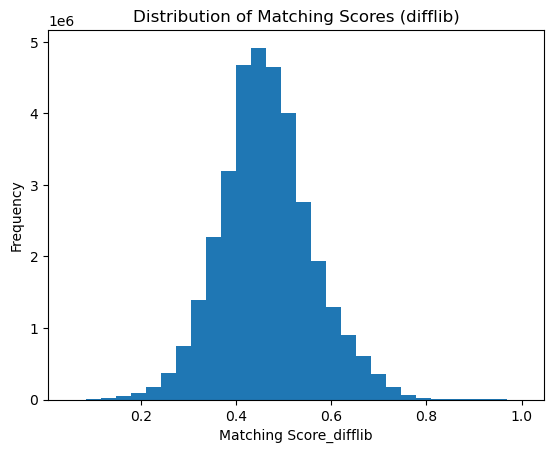

In [77]:
# distribution of matching_score
import matplotlib.pyplot as plt

# Extract matching scores from the match_list
scores = [score for _, _, score in match_list_difflib]

# Plot a histogram of the scores
plt.hist(scores, bins=30)
plt.xlabel('Matching Score_difflib')
plt.ylabel('Frequency')
plt.title('Distribution of Matching Scores (difflib)')
plt.show()

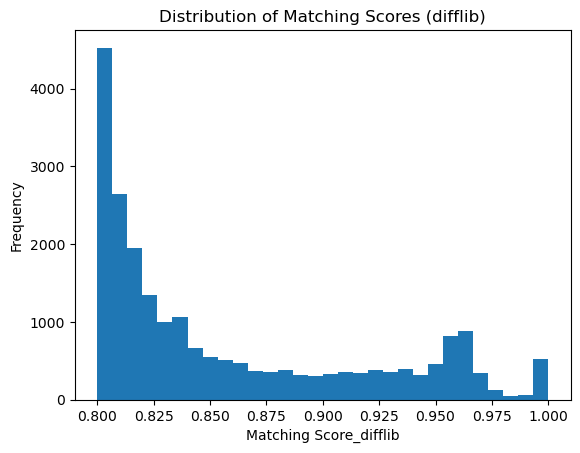

In [78]:
# distribution of matching_score > 0.8
import matplotlib.pyplot as plt

# Extract matching scores from the match_list
scores = [score for _, _, score in match_list_difflib if score >= 0.8]

# Plot a histogram of the scores
plt.hist(scores, bins=30)
plt.xlabel('Matching Score_difflib')
plt.ylabel('Frequency')
plt.title('Distribution of Matching Scores (difflib)')
plt.show()

In [79]:
# number of perfect match based on current algorithm is 517
num_perfect_matches_difflib = 0

for match in match_list_difflib:
    if match[2] == 1:
        num_perfect_matches_difflib += 1
        
print("Number of perfect matches:", num_perfect_matches_difflib)

Number of perfect matches: 517


The number of perfect match based on current algorithm is 517. The number of perfect match based on previous inner-join algorithm is also 517, partly proving that this algorithm is effective and meaningful.

## fuzzywuzzy

In [80]:
# sort list in descending order
match_list_fuzzywuzzy.sort(key=lambda x: x[2], reverse=True)

In [81]:
# examine match_list top 20
match_list_fuzzywuzzy[:20]

[(2826, 65833, 1.0),
 (6021, 55792, 1.0),
 (7282, 52610, 1.0),
 (7282, 52611, 1.0),
 (8626, 68891, 1.0),
 (10131, 79654, 1.0),
 (14727, 59239, 1.0),
 (14727, 60102, 1.0),
 (27928, 67132, 1.0),
 (27928, 67133, 1.0),
 (38023, 61664, 1.0),
 (38023, 61665, 1.0),
 (51034, 77495, 1.0),
 (66500, 55178, 1.0),
 (70242, 60990, 1.0),
 (72850, 51410, 1.0),
 (73468, 51620, 1.0),
 (88239, 76679, 1.0),
 (4663, 63976, 1.0),
 (6554, 78647, 1.0)]

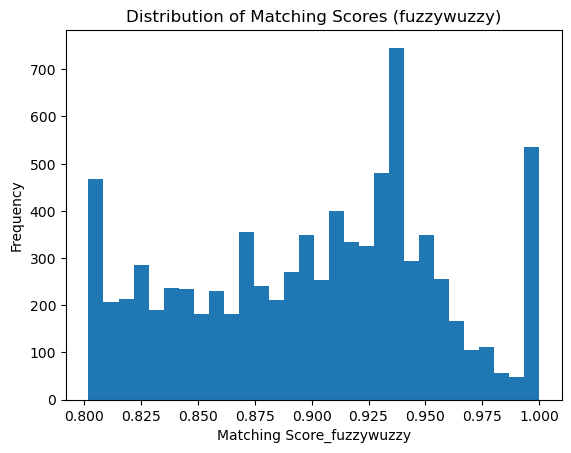

In [82]:
# distribution of matching_score
import matplotlib.pyplot as plt

# Extract matching scores from the match_list
scores = [score for _, _, score in match_list_fuzzywuzzy]

# Plot a histogram of the scores
plt.hist(scores, bins=30)
plt.xlabel('Matching Score_fuzzywuzzy')
plt.ylabel('Frequency')
plt.title('Distribution of Matching Scores (fuzzywuzzy)')
plt.show()

In [83]:
# number of perfect match based on current algorithm is 526
num_perfect_matches_fuzzywuzzy = 0

for match in match_list_fuzzywuzzy:
    if match[2] == 1:
        num_perfect_matches_fuzzywuzzy += 1
        
print("Number of perfect matches:", num_perfect_matches_fuzzywuzzy)

Number of perfect matches: 526


## Examine the difference in results from difflib and fuzzywuzzy

In [84]:
perfect_matches_difflib = []

for match in match_list_difflib:
    if match[2] == 1:
        perfect_matches_difflib.append(match)

In [85]:
perfect_matches_fuzzywuzzy = []

for match in match_list_fuzzywuzzy:
    if match[2] == 1:
        perfect_matches_fuzzywuzzy.append(match)

In [86]:
perfect_matches_fuzzywuzzy_only = [match for match in perfect_matches_fuzzywuzzy if match not in perfect_matches_difflib]

In [87]:
# fuzzywuzzy has 9 perfect match records more than difflib
len(perfect_matches_fuzzywuzzy_only)

9

In [88]:
# the perfect match records that only exist in fuzzywuzzy result
perfect_matches_fuzzywuzzy_only

[(14930, 28497, 1.0),
 (12023, 22650, 1.0),
 (43869, 80868, 1.0),
 (71144, 73025, 1.0),
 (49067, 60264, 1.0),
 (9197, 80636, 1.0),
 (40504, 18805, 1.0),
 (7822, 16491, 1.0),
 (57485, 27255, 1.0)]

### Examine (14930, 28497, 1.0)
* two records looks the same, so they are perfect match

In [89]:
df_left[df_left["entity_id"] == 14930]

,entity_id,name,address,city,state,zip_code_str,address_combined,address_combined_with_zip
14929,14930,windsor jewelry,16 n meridian st,indianapolis,in,46204,16 n meridian st indianapolis in,16 n meridian st indianapolis in 46204


In [90]:
df_right[df_right["business_id"] == 28497]

,business_id,name,address,city,state,zip_code,address_combined,address_combined_with_zip
28496,28497,windsor jewelry,16 n meridian st,indianapolis,in,46204,16 n meridian st indianapolis in,16 n meridian st indianapolis in 46204


### Examine (12023, 22650, 1.0)
* two records also looks the same, so they are perfect match

In [91]:
df_left[df_left["entity_id"] == 12023]

,entity_id,name,address,city,state,zip_code_str,address_combined,address_combined_with_zip
12022,12023,first nails,14418 n dale mabry hwy,tampa,fl,33618,14418 n dale mabry hwy tampa fl,14418 n dale mabry hwy tampa fl 33618


In [92]:
df_right[df_right["business_id"] == 22650]

,business_id,name,address,city,state,zip_code,address_combined,address_combined_with_zip
22649,22650,first nails,14418 n dale mabry hwy,tampa,fl,33618,14418 n dale mabry hwy tampa fl,14418 n dale mabry hwy tampa fl 33618


### The potential reason for this
* In FuzzyWuzzy, strings are first tokenized into words or sequences of words, and then matched based on the similarity between the token sets. This is well-suited to identify data that have minor differences, such as missing digits or transposed digits. SequenceMatcher focuses on finding the longest common subsequence between two sequences. It compute the matching score based on the number of matching elements and their position in the sequence.

# Output results to csv

In [93]:
len(match_list_difflib)

34707722

In [94]:
# filtering the list of tuples with matching_score > 0.8
match_list_difflib_gt_80pct = [(match[0], match[1], round(match[2], 2)) for match in match_list_difflib if match[2] > 0.8]
match_list_difflib_gt_80pct.sort(key=lambda x: x[2], reverse=True)

In [95]:
len(match_list_difflib_gt_80pct)

19725

In [96]:
# export filtered list to a csv file
import csv

with open('matching score_difflib.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['entity_id', 'business_id', 'matching_score'])  # writing header row
    writer.writerows(match_list_difflib_gt_80pct)  # writing filtered tuples

In [97]:
len(match_list_fuzzywuzzy)

8311

In [98]:
# export filtered list to a csv file
import csv

with open('matching score_fuzzywuzzy.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['entity_id', 'business_id', 'matching_score'])  # writing header row
    writer.writerows(match_list_fuzzywuzzy)  # writing filtered tuples

# all codes above take 3 hours to run